## CitiBike System Data Exploration

### by Martin Tschendel

### Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering New
York. Source of data: [Link](https://www.bikeshare.com/data/)

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

compared to the data from the San Francisco Bay Area, we have nearly 10 times more entries for New York in 2018. At first I only take the dataset for May 2018, in order to reduce the calculation time. 

next I will load the dataset

In [2]:
#load in the dataset
data_1805_NY = pd.read_csv('data/201805-citibike-tripdata.csv')

I'm interested in some characteristics of the new data set

In [3]:
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 208.8+ MB


## Data Quality Issues
I figured out some data quality issues and plan to solve them for the upcoming investigation steps.
* data type of columns 'starttime' and 'stoptime' is object and not datetime
* usertype is object and not category
* some column names like 'start station id' have white spaces 
* datatype of start_station_id and end_station_id is float and not category
* gender is currently integer (Zero=unknown; 1=male; 2=female) and should be ideally changed to category (Zero->unknown; 1->male; 2->female) 

In [4]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,367,2018-05-01 05:06:16.5840,2018-05-01 05:12:23.9650,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1
1,1313,2018-05-01 06:25:49.4250,2018-05-01 06:47:42.7120,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,1
2,1798,2018-05-01 06:40:26.4450,2018-05-01 07:10:25.1790,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,2
3,518,2018-05-01 07:06:02.9730,2018-05-01 07:14:41.0040,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,1
4,109,2018-05-01 07:26:32.3450,2018-05-01 07:28:21.5420,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,1


In [5]:
# Change datetype of columns starttime and stoptime to datetime
data_1805_NY.starttime = pd.to_datetime(data_1805_NY.starttime)
data_1805_NY.stoptime = pd.to_datetime(data_1805_NY.stoptime)

In [6]:
# Check if datetype of columns starttime and stoptime is changed to datetime
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: datetime64[ns](2), float64(4), int64(6), object(3)
memory usage: 208.8+ MB


In [7]:
# Change datetype of column usertype from object to category
data_1805_NY.usertype = data_1805_NY.usertype.astype('category')

In [8]:
# Check if datetype of column usertype is changed to category
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   category
birth year                 int64
gender                     int64
dtypes: category(1), datetime64[ns](2), float64(4), int64(6), object(2)
memory usage: 196.6+ MB


In [9]:
#rename columns
data_1805_NY.rename(columns={'start station id':'start_station_id', 'end station id':'end_station_id'}, inplace=True)
data_1805_NY.rename(columns={'start station latitude':'start_station_latitude', 'end station latitude':'end_station_latitude'}, inplace=True)
data_1805_NY.rename(columns={'start station longitude':'start_station_longitude', 'end station longitude':'end_station_longitude'}, inplace=True)
data_1805_NY.rename(columns={'start station name':'start_station_name', 'end station name':'end_station_name'}, inplace=True)
data_1805_NY.rename(columns={'birth year':'birth_year'}, inplace=True)

In [10]:
#check if columns have been renamed
data_1805_NY.head(1)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1


In [11]:
# Convert the start_station_id and end_station_id column's data type from a float to a category 
data_1805_NY.start_station_id = data_1805_NY.start_station_id.astype('category')
data_1805_NY.end_station_id = data_1805_NY.end_station_id.astype('category')

In [12]:
#check if station id columns have been changed to categories
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id           category
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             category
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bikeid                     int64
usertype                   category
birth_year                 int64
gender                     int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 175.8+ MB


## What is the structure of my New York dataset?
There are 1.82 Mio. individual ride entries for May 2018 and there are 15 features. 

### Variables with quantitative nature
* `tripduration`
* `birth_year`

### Variables with qualitative/categorical nature
* `starttime` and `stoptime`
* `start_station_id` and `end_station_id`
* `start_station_name` and `end_station_name`
* `start_station_latitude` and `end_station_latitude`
* `start_station_longitude` and `end_station_longitude`
* `bikeid`
* `usertype`
* `gender`

## What are the main features of interest in my dataset?

### Sole exploration of New York dataset
* When are the most trips taken in terms of time of day, day of the week?
* How long does the average trip take?
* Does the above depend on if the user is a Subscriber or Customer/ Male or Female/'old' or 'young'?
* Where are the stations located and how how many bikes are rented there per year?

### Comparative exploration of San Francisco and New York datasets
* When are the most trips taken in terms of time of day, day of the week?
* How long does the average trip take?
* Does the above depend on if the user is a Subscriber or Customer/ Male or Female/'old' or 'young'?


## What features in the dataset do I think will help support my investigation into my feature of interest?
My main features of interest in this dataset are each trip's start and end time. They can help me to answer the question when the most trips are taken in terms of time of day, day of the week or how long does the average trip take. Related to the third question mentioned above (regarding New York and San Francisco datasets), the features of user type, gender and age are important. In order to get an answer to the last question towards the New York dataset, the station's longitude, latitude and station's id is important.

## Univariate Exploration
At first I will start to look at the distribution of rides across different times intervalls: time of day and day of the week. Here I want to find answers to the question: When are most trips taken in terms of time of day or day of the week?

**Number of Rides Across Different Hours of the Day**

In [13]:
#extract the starting hours of each ride, store them in a series and convert series to dataframe
data_1805_NY['hour'] = data_1805_NY.starttime.dt.hour

In [14]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,hour
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1,5
1,1313,2018-05-01 06:25:49.425,2018-05-01 06:47:42.712,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,1,6
2,1798,2018-05-01 06:40:26.445,2018-05-01 07:10:25.179,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,2,6
3,518,2018-05-01 07:06:02.973,2018-05-01 07:14:41.004,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,1,7
4,109,2018-05-01 07:26:32.345,2018-05-01 07:28:21.542,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,1,7


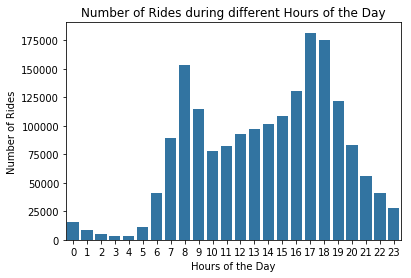

In [15]:
#plot the number of rides per hour of the day
base_color = sb.color_palette()[0]
sb.countplot(data = data_1805_NY, x = 'hour', color = base_color);
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Rides")
plt.title("Number of Rides during different Hours of the Day");

## Observations and next steps
We can see that most of the rides happen in the morning and evening times during the peak hours. A similar pattern can be found when exploring the San Francsico data. Next, I examine distribution of rides across different days of the week.

**Number of Rides Across Different Days of the Week**

In [16]:
#extract the weekdays of each ride, store them in a series and convert series to dataframe
data_1805_NY['weekday'] = data_1805_NY['starttime'].dt.weekday_name

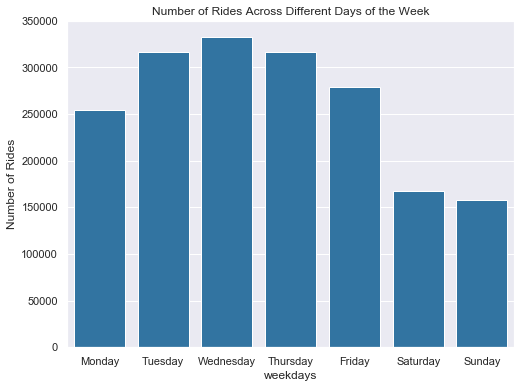

In [17]:
#plot the number of rides in different weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.set(rc={'figure.figsize':(8,6)})
sb.countplot(data = data_1805_NY, x = 'weekday', color = base_color, order = order);
plt.xlabel("weekdays")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Days of the Week");

## Observations and next steps
We can see that most of the rides happen during the working days. Fewer rides happen during the weekends. 

## Bivariate Exploration
Here I want to find answers to the following questions:

* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?

At first I'm interested in the trip time between males/females, between different days in a week and between different unser types.

**Trip time of males and females**

In [18]:
#as general info, get value counts of member_gender column
data_1805_NY['gender'].value_counts()

1    1203816
2     421304
0     199590
Name: gender, dtype: int64

In [19]:
#replace values: 1 --> male, 2 --> female, 0 --> unknown
data_1805_NY.gender.replace(1, 'male', inplace=True)

In [20]:
data_1805_NY.gender.replace(2, 'female', inplace=True)
data_1805_NY.gender.replace(0, 'unknown', inplace=True)

In [21]:
data_1805_NY['gender'].value_counts()

male       1203816
female      421304
unknown     199590
Name: gender, dtype: int64

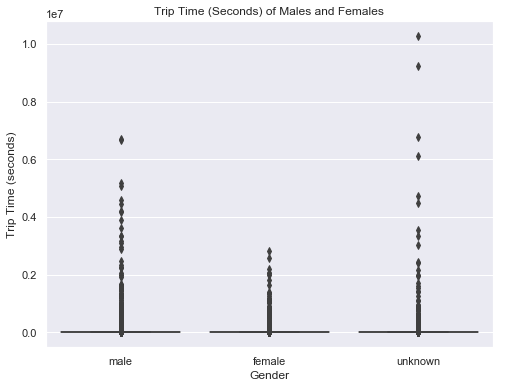

In [22]:
#plot trip time of males and females
sb.boxplot(data = data_1805_NY, x = 'gender', y = 'tripduration', color = base_color);
plt.xlabel("Gender")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) of Males and Females");

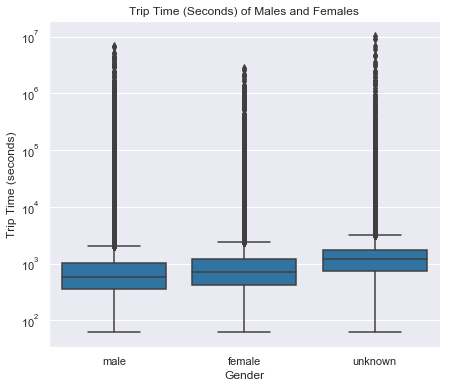

In [23]:
#use log scale to make results visible
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sb.boxplot(data = data_1805_NY, x = 'gender', y = 'tripduration', color = base_color);
plt.xlabel("Gender")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) of Males and Females");

In [24]:
data_1805_NY_1 = data_1805_NY.copy()

In [26]:
#exlude the values 'unknown'
options_3 = ['female', 'male']
data_1805_NY_1 = data_1805_NY_1[data_1805_NY_1['gender'].isin(options_3)]

In [27]:
#check if values 'unknown' are excluded
data_1805_NY_1['gender'].value_counts()

male      1203816
female     421304
Name: gender, dtype: int64

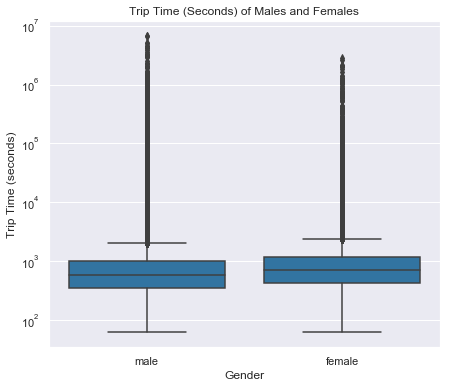

In [29]:
#plot trip time of males and females
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sb.boxplot(data = data_1805_NY_1, x = 'gender', y = 'tripduration', color = base_color);
plt.xlabel("Gender")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) of Males and Females");